## 1. Collect the Data

In [34]:
import pandas as pd
import csv
import requests
import numpy as np
sheet = pd.read_excel("sample1_DrDOS.xlsx")
sheet.head()

Unnamed: 0                               Flow ID     Source IP  \
0         425  172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5   
1         430  172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1   
2        1654  172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5   
3        2927  172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5   
4         694  172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5   

    Source Port  Destination IP   Destination Port   Protocol   Timestamp  \
0           634    192.168.50.1              60495         17    43435.45   
1           634      172.16.0.5              60495         17    43435.45   
2           634    192.168.50.1              46391         17    43435.45   
3           634    192.168.50.1              11894         17    43435.45   
4           634    192.168.50.1              27878         17    43435.45   

    Flow Duration   Total Fwd Packets  ...   Active Std   Active Max  \
0           28415                  97  ...          0.0            0   
1               2                   2  ...          0.0            0   
2           48549                 200  ...          0.0            0   
3           48337                 200  ...          0.0            0   
4           32026                 200  ...          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min  SimillarHTTP  \
0            0        0.0        0.0          0          0             0   
1            0        0.0        0.0          0          0             0   
2            0        0.0        0.0          0          0             0   
3            0        0.0        0.0          0          0             0   
4            0        0.0        0.0          0          0             0   

    Inbound      Label  
0         1  DrDoS_DNS  
1         0  DrDoS_DNS  
2         1  DrDoS_DNS  
3         1  DrDoS_DNS  
4         1  DrDoS_DNS  

[5 rows x 88 columns]

## 2. Explore the Data

In [35]:
sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    9999 non-null   int64  
 1   Flow ID                       9999 non-null   object 
 2    Source IP                    9999 non-null   object 
 3    Source Port                  9999 non-null   int64  
 4    Destination IP               9999 non-null   object 
 5    Destination Port             9999 non-null   int64  
 6    Protocol                     9999 non-null   int64  
 7    Timestamp                    9999 non-null   float64
 8    Flow Duration                9999 non-null   int64  
 9    Total Fwd Packets            9999 non-null   int64  
 10   Total Backward Packets       9999 non-null   int64  
 11  Total Length of Fwd Packets   9999 non-null   int64  
 12   Total Length of Bwd Packets  9999 non-null   int64  
 13   Fw

In [36]:

sheet.columns = sheet.columns.str.strip()
sheet.columns

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

<Axes: title={'center': 'Flow Duration Histogram'}, ylabel='Frequency'>

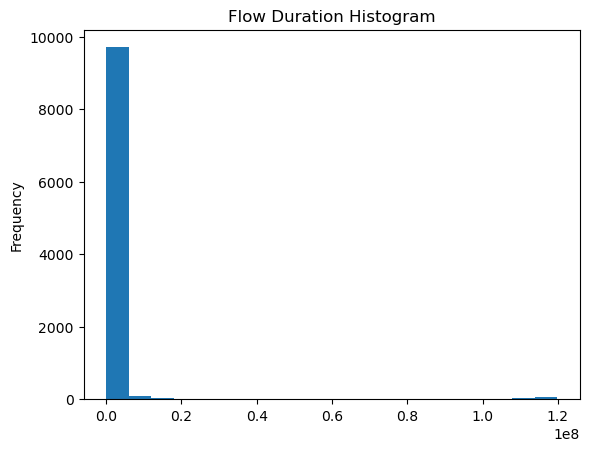

In [37]:
sheet['Flow Duration'].plot(kind='hist', bins=20, title='Flow Duration Histogram')

<Axes: title={'center': 'Packet Length Variance'}>

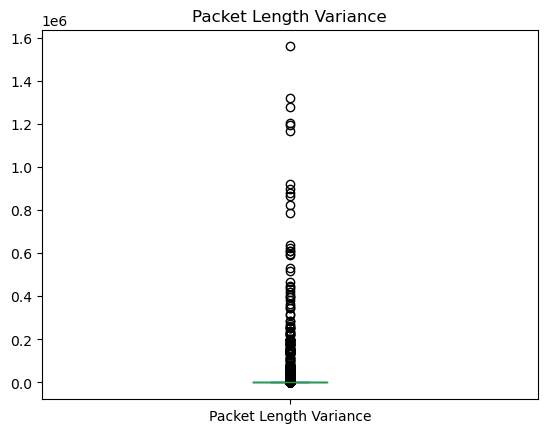

In [38]:
sheet['Packet Length Variance'].plot(kind='box', title='Packet Length Variance')

<Axes: title={'center': 'Total Fwd Packets vs. Total Backward Packets'}, xlabel='Total Fwd Packets', ylabel='Total Backward Packets'>

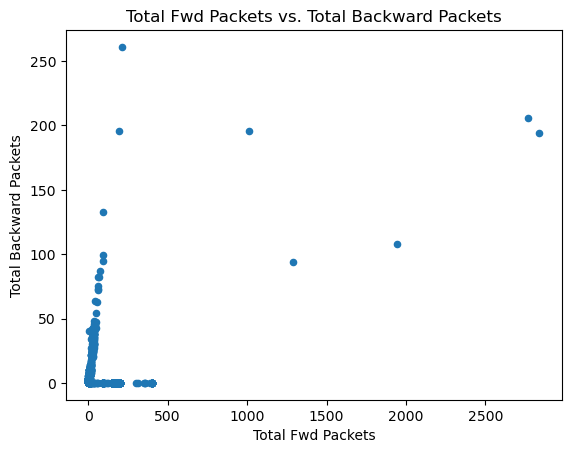

In [39]:
sheet.plot(kind='scatter', x='Total Fwd Packets', y='Total Backward Packets', title='Total Fwd Packets vs. Total Backward Packets')


In [40]:
sheet['Flow IAT Mean'].plot(kind='line', title='Flow IAT Mean Over Time')

<Axes: title={'center': 'Flow IAT Mean Over Time'}>

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = sheet.select_dtypes(include='number')
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Features')

Text(0.5, 1.0, 'Correlation Heatmap for Numerical Features')

<Axes: title={'center': 'Label Distribution'}, ylabel='count'>

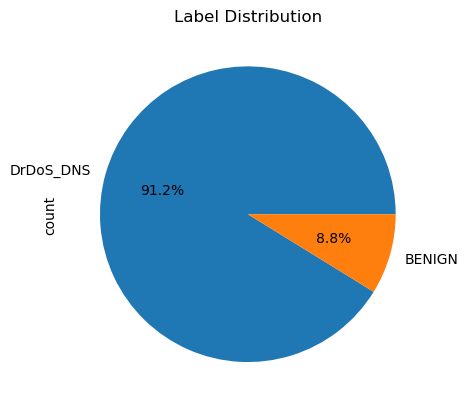

In [42]:
sheet['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Label Distribution')

In [43]:
sheet['Label'] = sheet['Label'].map({"BENIGN": 0,"DrDoS_DNS": 1})
sheet['Label'].value_counts()

Label
1    9119
0     880
Name: count, dtype: int64

## 3. Prepare the Data

In [44]:
df_nums = sheet[sheet.select_dtypes(include=['number']).columns]

inf_mask = np.isinf(df_nums.values)
df_nums.replace([np.inf, -np.inf], np.nan, inplace=True)
#df_nums.fillna(df_nums.max(), inplace=True)
df_nums.dropna(inplace=True) # dropping nans for now

C:\Users\15hen\AppData\Local\Temp\ipykernel_4644\1633850366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\15hen\AppData\Local\Temp\ipykernel_4644\1633850366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums.dropna(inplace=True) # dropping nans for now


In [45]:
df_nums.head(10)

Unnamed: 0  Source Port  Destination Port  Protocol  Timestamp  \
0         425          634             60495        17   43435.45   
1         430          634             60495        17   43435.45   
2        1654          634             46391        17   43435.45   
3        2927          634             11894        17   43435.45   
4         694          634             27878        17   43435.45   
5         838          634             47149        17   43435.45   
6        3090          634             22713        17   43435.45   
7        2594          634             49912        17   43435.45   
8        2698          634             56681        17   43435.45   
9         277          634             13161        17   43435.45   

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          28415                 97                       0   
1              2                  2                       0   
2          48549                200                       0   
3          48337                200                       0   
4          32026                200                       0   
5          46469                200                       0   
6          31201                200                       0   
7          50453                200                       0   
8          31008                200                       0   
9          30143                200                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  ...  Active Mean  \
0                        42680                            0  ...          0.0   
1                          880                            0  ...          0.0   
2                        88000                            0  ...          0.0   
3                        88000                            0  ...          0.0   
4                        88000                            0  ...          0.0   
5                        88000                            0  ...          0.0   
6                        88000                            0  ...          0.0   
7                        88000                            0  ...          0.0   
8                        88000                            0  ...          0.0   
9                        88000                            0  ...          0.0   

   Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
0         0.0           0           0        0.0       0.0         0   
1         0.0           0           0        0.0       0.0         0   
2         0.0           0           0        0.0       0.0         0   
3         0.0           0           0        0.0       0.0         0   
4         0.0           0           0        0.0       0.0         0   
5         0.0           0           0        0.0       0.0         0   
6         0.0           0           0        0.0       0.0         0   
7         0.0           0           0        0.0       0.0         0   
8         0.0           0           0        0.0       0.0         0   
9         0.0           0           0        0.0       0.0         0   

   Idle Min  Inbound  Label  
0         0        1      1  
1         0        0      1  
2         0        1      1  
3         0        1      1  
4         0        1      1  
5         0        1      1  
6         0        1      1  
7         0        1      1  
8         0        1      1  
9         0        1      1  

[10 rows x 84 columns]

## 4. Train the Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# For adjusting Imbalance of Having less benign data we include
from sklearn.utils.class_weight import compute_class_weight 
#data pre-processing

x = df_nums.drop(columns='Label')
y = df_nums['Label']

In [47]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

# Calculate class weights based on the imbalance in the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights

# This looks right as The Benign data notes as 0 is given a higher weight
# Than that of the MSSQL malicious attack. About a 10:1 ratio. 

array([5.66241135, 0.54842698])

In [48]:
# Create a dictionary for class weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the logistic regression model with class weights
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight=class_weight_dict)
model.fit(x_train, y_train)

LogisticRegression(class_weight={0: 5.662411347517731, 1: 0.5484269817282593},
                   max_iter=1000, solver='liblinear')

In [49]:
# Predict
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.970956434651978
